In [2]:
import os
import sys
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import pickle
import json
import pyperclip
%matplotlib inline

In [3]:
def plot_(sensitive_class, bars_width=0.15):
    df_1 = df[sensitive_class].value_counts().sort_index()
    df_2 = df_readmitted[sensitive_class].value_counts().sort_index()

    X_axis = np.arange(len(df_1))

    width = bars_width
    num_bars = 2
    bar_pos = [ i - num_bars/2 + 0.5 for i in range(num_bars) ] # Calulation to retrieve the bar position in relation to the center

    plt.bar(X_axis + width*bar_pos[0], df_1.values / df.shape[0], label = "whole dataset", width=width)
    plt.bar(X_axis + width*bar_pos[1], df_2.values / df_readmitted.shape[0], label = "readmitted-subset", width=width)

    plt.xticks(X_axis, df_1.index) #, rotation=90)
    #plt.xlabel("Groups")
    plt.ylabel("Normalized occurrence")
    #plt.title("Number of Students in each group")
    plt.legend()


    plt.gcf().set_size_inches(4,4)
    plt.gcf().savefig("images/discrim_global_" + sensitive_class + ".pdf")
    plt.show()


In [5]:
train = {
    "Random Forest Classifier": 0.708,
    "Logistic Regression": 0.707,
    "Stochastic Gradient Descent": 0.697,
    "Gradient Boosting Classifier": 0.711
}

test = {
    "Random Forest Classifier": 0.708,
    "Logistic Regression": 0.707,
    "Stochastic Gradient Descent": 0.697,
    "Gradient Boosting Classifier": 0.711
}

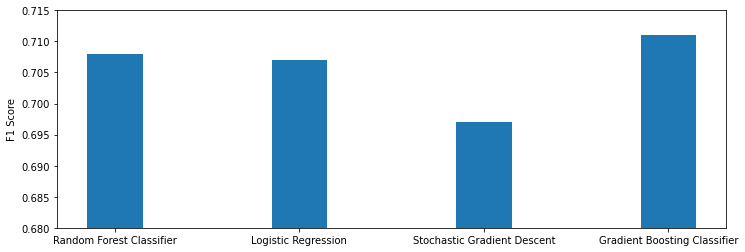

In [16]:
X_axis = np.arange(4)

width = 0.3
num_bars = 2
bar_pos = [ i - num_bars/2 + 0.5 for i in range(num_bars) ] # Calulation to retrieve the bar position in relation to the center

#plt.bar(X_axis + width*bar_pos[0], train.values(), label = "train", width=width)
#plt.bar(X_axis + width*bar_pos[1], test.values(), label = "test", width=width)
plt.bar(X_axis, train.values(), label = "train", width=width)

plt.xticks(X_axis, train.keys()) #, rotation=90)
#plt.xlabel("Groups")
plt.ylabel("F1 Score")
#plt.title("Number of Students in each group")

plt.ylim((0.68, 0.715))
#plt.legend()


plt.gcf().set_size_inches(12,4)
plt.gcf().savefig("images/models_f1_score.pdf")
plt.show()